In [1]:
import numpy as np
from matplotlib import pyplot as plt
import plotly as pl
import plotly.graph_objs as go
from numba import njit


In [126]:
@njit
def generate_X_Y(n = 3, n1 = 10):
    X = []
    for i in range(n):
        X_k = np.random.rand()
        X.append(X_k)
    X.sort()
    #X = np.array([i for i in range(10)])/10
    
    X_new = []
    Y = []
    X_k_1 = 0.0
    for i,X_k in enumerate(X):
        if i<5: N = 10
        else: N = n1 
        delta = X_k - X_k_1
        X_new.extend([X_k_1 + j * delta/N for j in range(N+1)])
        Y.extend([i/n for j in range(N+1)])
        X_k_1 = X_k
    X_new += [X[-1], 1.]
    Y += [1.0, 1.0]
    return X_new, Y

In [140]:
%%time
n = 15
X, Y = generate_X_Y(n = n)

CPU times: total: 0 ns
Wall time: 0 ns


In [137]:
%%time
rez = np.sqrt(n)*(abs(np.array(Y[1:])-np.array(X[1:]))/np.sqrt(np.array(X[1:])))
max(rez)

CPU times: total: 0 ns
Wall time: 999 µs


1.4207365411705775

In [138]:
np.log(np.log(1/np.array(X)))

C:\Users\Николай\AppData\Local\Temp\ipykernel_15628\447423131.py:1: RuntimeWarning:

divide by zero encountered in divide

C:\Users\Николай\AppData\Local\Temp\ipykernel_15628\447423131.py:1: RuntimeWarning:

divide by zero encountered in log



array([            inf,  1.74674185e+00,  1.61794892e+00,  1.53412617e+00,
        1.47008147e+00,  1.41741649e+00,  1.37222697e+00,  1.33235908e+00,
        1.29649063e+00,  1.26374792e+00,  1.23352154e+00,  1.23352154e+00,
        1.12120931e+00,  1.03029231e+00,  9.52259501e-01,  8.82888768e-01,
        8.19752975e-01,  7.61317235e-01,  7.06543241e-01,  6.54692239e-01,
        6.05217427e-01,  5.57700934e-01,  5.57700934e-01,  5.01020003e-01,
        4.46358326e-01,  3.93330497e-01,  3.41626289e-01,  2.90990089e-01,
        2.41206754e-01,  1.92091572e-01,  1.43482948e-01,  9.52369298e-02,
        4.72230134e-02,  4.72230134e-02,  4.02157225e-02,  3.32104461e-02,
        2.62068267e-02,  1.92045097e-02,  1.22031436e-02,  5.20237949e-03,
       -1.79812880e-03, -8.79872494e-03, -1.57997502e-02, -2.28015437e-02,
       -2.28015437e-02, -3.95335466e-02, -5.62764028e-02, -7.30346078e-02,
       -8.98126110e-02, -1.06614825e-01, -1.23445633e-01, -1.40309399e-01,
       -1.57210473e-01, -

C:\Users\Николай\AppData\Local\Temp\ipykernel_15628\1724648160.py:2: RuntimeWarning:

divide by zero encountered in divide

C:\Users\Николай\AppData\Local\Temp\ipykernel_15628\1724648160.py:2: RuntimeWarning:

divide by zero encountered in log

C:\Users\Николай\AppData\Local\Temp\ipykernel_15628\1724648160.py:2: RuntimeWarning:

invalid value encountered in multiply

C:\Users\Николай\AppData\Local\Temp\ipykernel_15628\1724648160.py:2: RuntimeWarning:

invalid value encountered in sqrt

C:\Users\Николай\AppData\Local\Temp\ipykernel_15628\1724648160.py:3: RuntimeWarning:

divide by zero encountered in divide

C:\Users\Николай\AppData\Local\Temp\ipykernel_15628\1724648160.py:3: RuntimeWarning:

divide by zero encountered in log

C:\Users\Николай\AppData\Local\Temp\ipykernel_15628\1724648160.py:3: RuntimeWarning:

invalid value encountered in multiply

C:\Users\Николай\AppData\Local\Temp\ipykernel_15628\1724648160.py:3: RuntimeWarning:

invalid value encountered in sqrt



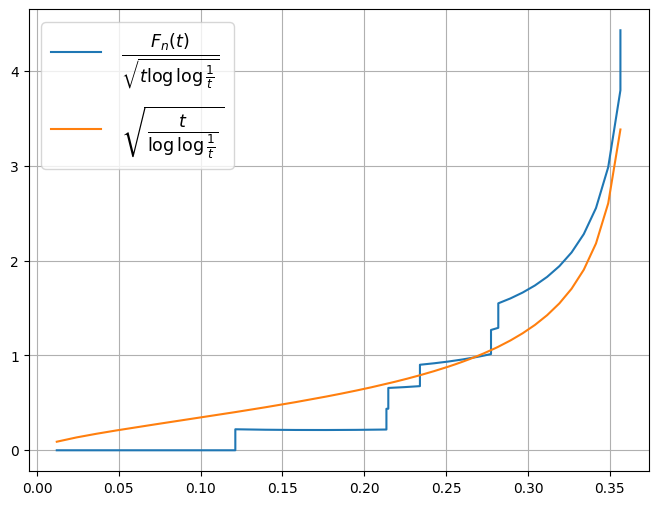

In [160]:
plt.figure(figsize = (8, 6))
plt.plot(X, Y/(np.sqrt(X * np.log(np.log(1/np.array(X))))), label = r'$\frac{F_n(t)}{\sqrt{t\log{\log{\frac{1}{t}}}}}$')
plt.plot(X, X/(np.sqrt(X * np.log(np.log(1./np.array(X))))), label = r'$\sqrt{\frac{t}{\log{\log{\frac{1}{t}}}}}$')
#plt.plot(X, Y/(np.sqrt(X)), label = r'$\frac{F_n(t)}{\sqrt{t}}$')
#plt.plot(X, X/(np.sqrt(X)), label = '$sqrt(t)$')
plt.legend(fontsize = 18)
plt.grid()
plt.savefig("imgDelta.png")
plt.show()

In [49]:
1./np.exp(np.exp(1))

0.06598803584531254

In [46]:
fig = go.Figure()
trace = {
  "x": X,
  "y": Y/np.sqrt(X), 
    "name": r'$\frac{F_n(t)}{\sqrt{t}}$'};

trace1 = {
  "x": X,
  "y": X/(np.sqrt(X)), 
    "name": '$sqrt(t)$'};

# trace2 = {
#   "x": X,
#   "y": abs(np.array(Y)-np.array(X)), 
#     "name": '$delta_n(x)$'};


# trace3 = {
#   "x": X[1:],
#   "y": abs(np.array(Y[1:])-np.array(X[1:]))/np.sqrt(np.array(X[1:])), 
#     "name": '$delta_n(x)/sqrt$'};

fig.add_trace(trace)
fig.add_trace(trace1)
#fig.add_trace(trace2)
#fig.add_trace(trace3)
fig.update_layout(
    title="$F_n - эмпирическая\ функция\ распределения$",
    autosize=False,
    width=800,
    height=800,
    #legend=dict(xanchor="center", orientation="h")
    );
fig.show()

C:\Users\Николай\AppData\Local\Temp\ipykernel_15628\3466084153.py:4: RuntimeWarning:

invalid value encountered in divide

C:\Users\Николай\AppData\Local\Temp\ipykernel_15628\3466084153.py:9: RuntimeWarning:

invalid value encountered in divide

